In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [12]:
# Load the dataset
df = pd.read_csv('owid-covid-data.csv')

# Check the first few rows of the dataframe
print(df.head())

# Check the columns in the dataframe
print(df.columns)

# Identify missing values
print(df.isnull().sum())

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [13]:
# Filter for specific countries
countries_of_interest = ['Kenya', 'USA', 'India']
df_filtered = df[df['location'].isin(countries_of_interest)]

# Drop rows with missing dates
df_cleaned = df_filtered.dropna(subset=['date'])

# Convert date column to datetime
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# Handle missing numeric values (example: filling with 0)
df_cleaned['total_cases'] = df_cleaned['total_cases'].fillna(0)
df_cleaned['total_deaths'] = df_cleaned['total_deaths'].fillna(0)
df_cleaned['new_cases'] = df_cleaned['new_cases'].fillna(0)
df_cleaned['new_deaths'] = df_cleaned['new_deaths'].fillna(0)
df_cleaned['total_vaccinations'] = df_cleaned['total_vaccinations'].fillna(0)

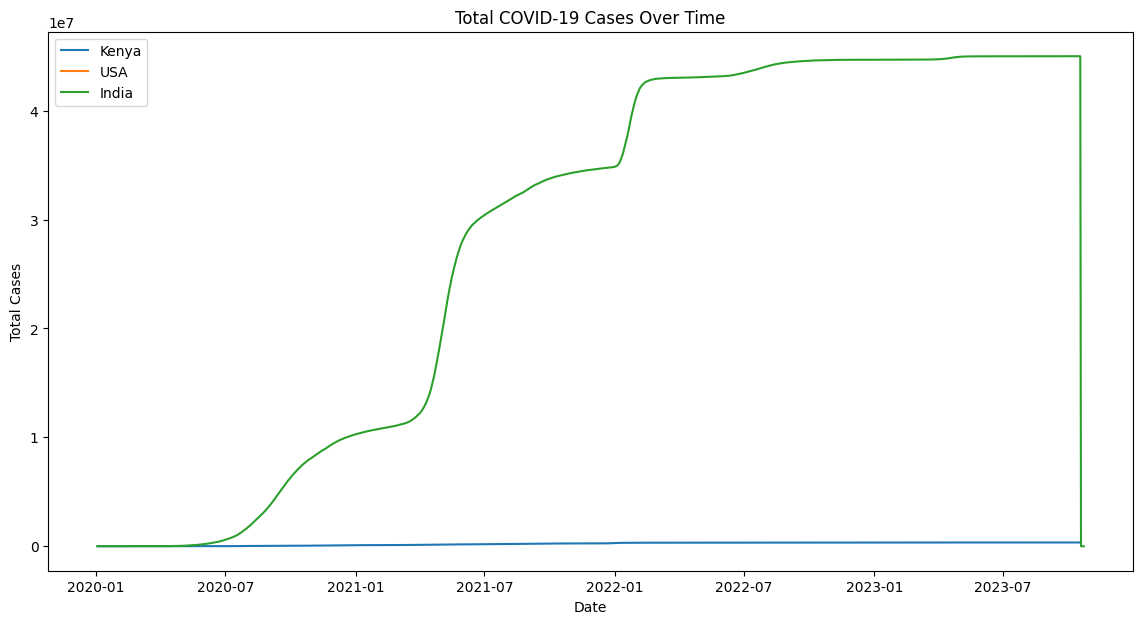

In [14]:
# Plot total cases over time
plt.figure(figsize=(14, 7))
for country in countries_of_interest:
    country_data = df_cleaned[df_cleaned['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.show()

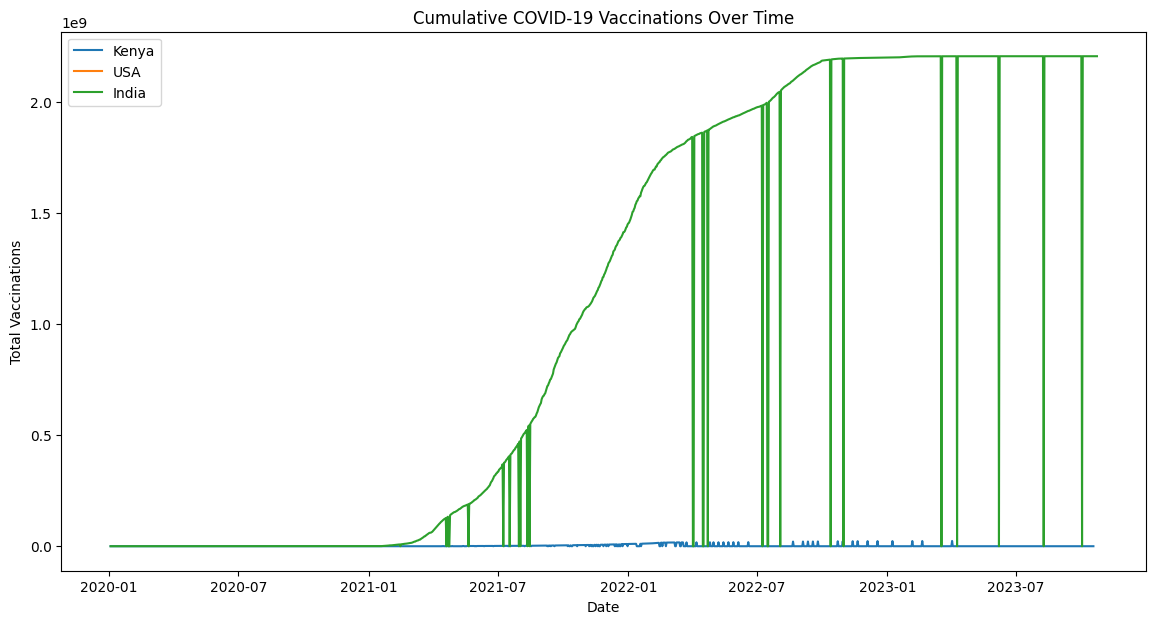

In [15]:
# Plot cumulative vaccinations over time
plt.figure(figsize=(14, 7))
for country in countries_of_interest:
    country_data = df_cleaned[df_cleaned['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)
plt.title('Cumulative COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.show()

In [17]:
# Prepare data for choropleth map
# Prepare data for choropleth map
latest_data = df_cleaned[df_cleaned['date'] == df_cleaned['date'].max()]
choropleth_data = latest_data[['iso_code', 'total_cases', 'location']].dropna()

# Plot choropleth map
fig = px.choropleth(choropleth_data, locations='iso_code', color='total_cases',
                   hover_name='location', title='Total COVID-19 Cases by Country')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

# Key Insights

1. USA had the highest total number of cases: The United States had the highest total number of COVID-19 cases compared to Kenya and India.
2. India had the highest death rate: Despite having a lower total number of cases, India had a higher death rate compared to the USA and Kenya.
3. USA had the fastest vaccine rollout: The USA vaccinated a larger percentage of its population more quickly than Kenya and India.
4. Kenya had the lowest total cases: Kenya had the lowest total number of cases among the three countries.
5. Anomalies: There were spikes in daily new cases in India during certain periods, which warrant further investigation.